In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [3]:
#upload do arquivo
df = pd.read_excel('datasets/AdventureWorks.xlsx')

In [4]:
#visualizando cinco primeiras linhas
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [5]:
#quantidade de linhas e colunas
df.shape

(904, 16)

In [6]:
#tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [8]:
#Qual a receita total?
df['Valor Venda'].sum()

5984606.1426

In [12]:
#Qual o custo total?
df['Custo'] = df['Custo Unitário'].mul(df['Quantidade'])

In [13]:
round(df['Custo'].sum(),2)

2486783.05

In [14]:
#achando o lucro total
df['Lucro'] = df['Valor Venda'] - df['Custo']

In [17]:
#total lucro
round(df['Lucro'].sum(),2)

3497823.09

In [18]:
#qual foi o tempo que levou para o produto fosse enviado?
df['Tempo envio'] = df['Data Envio'] - df['Data Venda']

In [27]:
#transformando as datas em int
df['Tempo envio'] = (df['Data Envio'] - df['Data Venda']).dt.days #

In [28]:
#verificando o tipo da coluna tempo de envio
df['Tempo envio'].dtypes

dtype('int64')

In [29]:
#media do tempo de envio por marca
df.groupby('Marca')['Tempo envio'].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo envio, dtype: float64

In [30]:
###   Valores faltantes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo envio       0
dtype: int64

In [33]:
#lucro por ano e marca
#agrupando por ano e marca
df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: Lucro, dtype: float64

In [35]:
#resetando o index
df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index()

,Data Venda,Marca,Lucro
0,2008,Adventure Works,3.066412e+05
1,2008,Contoso,5.641600e+04
2,2008,Fabrikam,1.557021e+06
3,2009,Adventure Works,4.053951e+05
4,2009,Contoso,1.382590e+05
5,2009,Fabrikam,1.034091e+06


In [36]:
# qual o total de produtos vendidos?
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

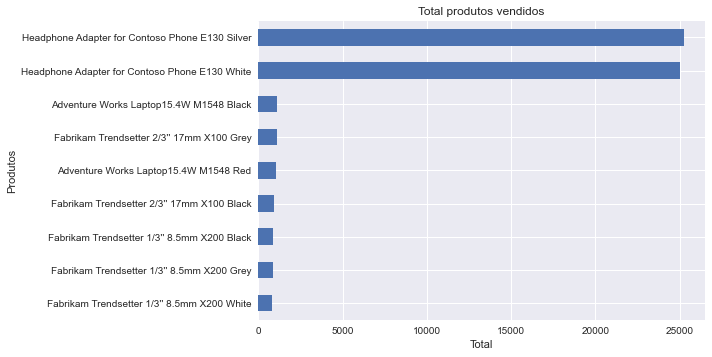

In [38]:
#Grafico do total de produtos vendidos
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=True).plot.barh(title='Total produtos vendidos')
plt.xlabel("Total")
plt.ylabel('Produtos');

Text(0, 0.5, 'Receita')

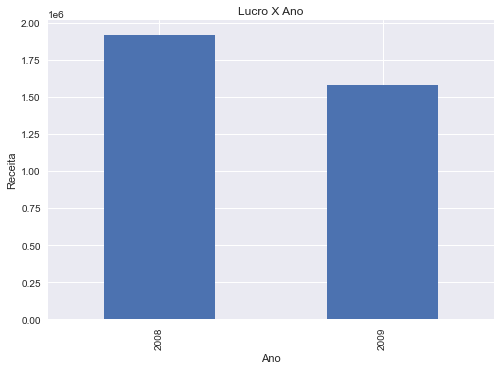

In [39]:
#lucro por ano
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().plot.bar(title='Lucro X Ano')
plt.xlabel("Ano")
plt.ylabel("Receita")

In [40]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum()

Data Venda
2008    1.920078e+06
2009    1.577745e+06
Name: Lucro, dtype: float64

In [41]:
#selecionando apenas as vendas de 2009
df_2009 = df[df['Data Venda'].dt.year == 2009]

Text(0, 0.5, 'Lucro')

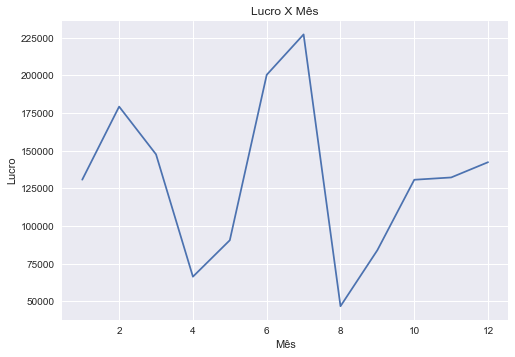

In [42]:
df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].sum().plot(title='Lucro X Mês')
plt.xlabel('Mês')
plt.ylabel('Lucro')

Text(0, 0.5, 'Marca')

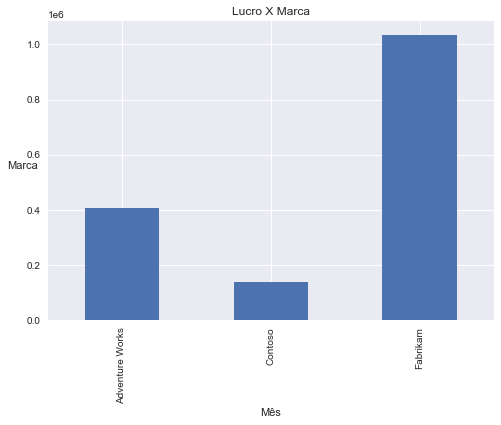

In [48]:
df_2009.groupby(df_2009['Marca'])['Lucro'].sum().plot.bar(title='Lucro X Marca')
plt.xlabel('Mês')
plt.ylabel('Marca', rotation='horizontal')

Text(0, 0.5, 'Classe')

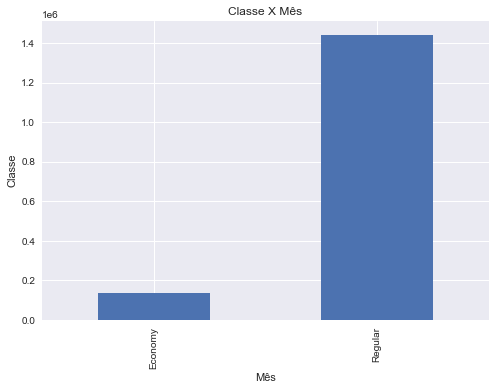

In [50]:
df_2009.groupby(df_2009['Classe'])['Lucro'].sum().plot.bar(title='Classe X Mês')
plt.xlabel('Mês')
plt.ylabel('Classe')

In [52]:
df['Tempo envio'].describe()

count    904.000000
mean       8.543142
std        3.056920
min        4.000000
25%        6.000000
50%        9.000000
75%       11.000000
max       20.000000
Name: Tempo envio, dtype: float64

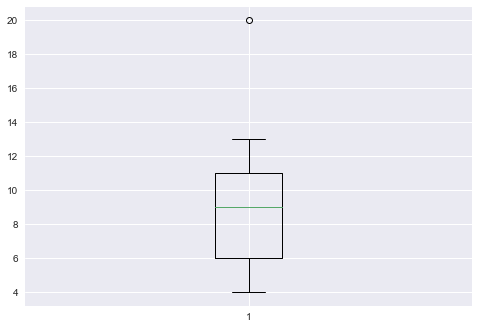

In [54]:
#gráfico de boxplot
plt.boxplot(df['Tempo envio']);

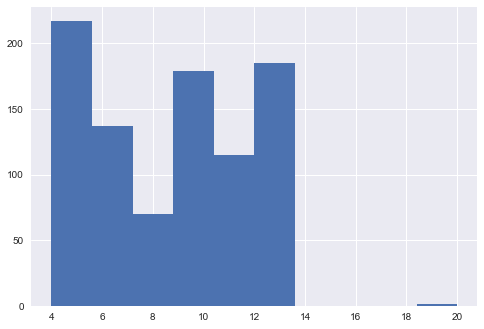

In [56]:
#histograma
plt.hist(df['Tempo envio']);

In [57]:
#tempo mínimo de envio
df['Tempo envio'].min()

4

In [58]:
#tempo máximo
df['Tempo envio'].max()

20

In [59]:
#localizando o tempo de envio discrepante
df[df['Tempo envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [60]:
df.to_csv('df_vendas_novo.csv', index=False)